<a href="https://colab.research.google.com/github/emmacampo/NN_Bank_Churn_Prediction/blob/main/NN_Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
import random
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# importing roc_curve to plot
from sklearn.metrics import roc_curve
# importing metrics
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, recall_score

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data= pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Churn.csv")

Mounted at /content/drive


## Data Overview

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

We are working with 10000 rows and 14 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We have 9 integer, 2 float and 3 object datatypes in our dataset, using 1.1+ MB memory

In [ ]:
data.duplicated().sum()

0

No duplicates in our dataset.

In [ ]:
#making a copy to avoid changes to original
df = data.copy()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


The average customer is the following:
a 29 year old with a credit score of 650, with a 5 year tenure and a balance of 76500. The average number of products purchased by the custoer is 1.5, and a 70% chance of owning a credit card. The likelihood of being an active member of the bank is 50% and the average salary is 100 000. We can also see that there is a 20% chance that the customer has churned. The age is ranging between 18 and 92, suggesting a very wide range of age groups and subsequent target markets. Furthermore, salary is ranging between 11 and 200 000, again implying that the customer base is diverse. The balance with the Bank shows a minimum of 0 and a maximum of 250 000 which gives us information about the usage of the bank services and the customers' financial situations.

In [ ]:
# dropping the 'CustomerId', 'Surname' and 'RowNumber' columns
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)

We are dropping 3 columns here (unique identifiers) as they will not provide any value to our neural network.

In [ ]:
#confirming that the columns were dropped correctly
df.shape

(10000, 11)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

In [ ]:
#function to plot histogram and boxplots
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

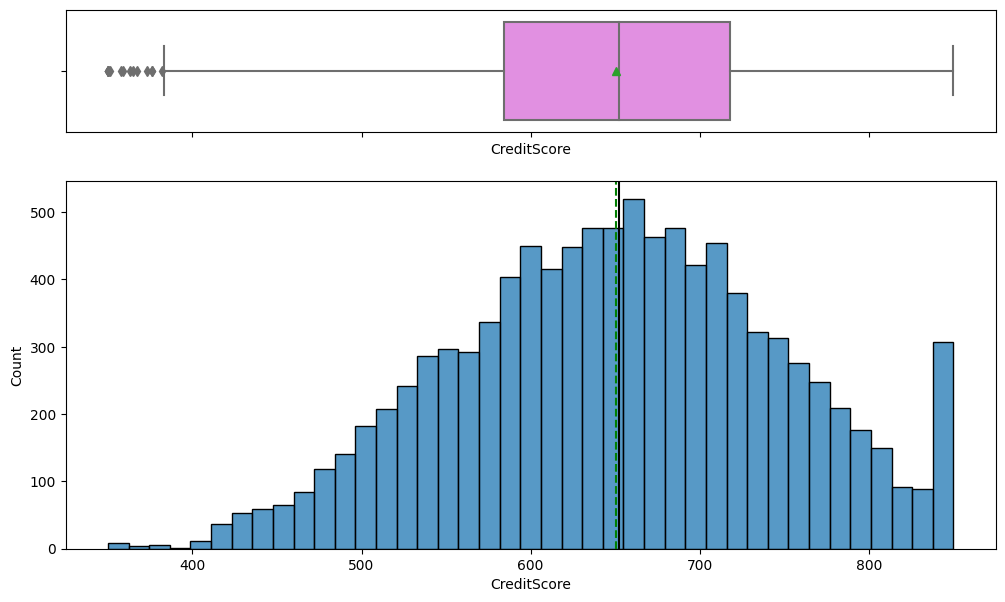

In [ ]:
histogram_boxplot(df,"CreditScore")
plt.show()

'Credit score' is left-skewed and showing a few outliers in the 100-350 range. Te trend appears to be between 550-750, with another noticable peak att 850.

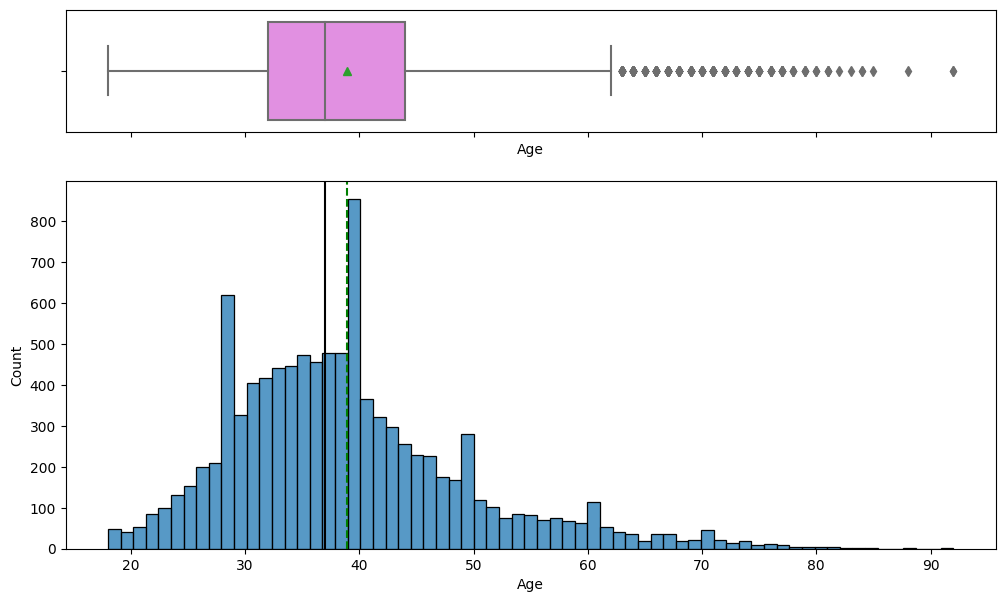

In [ ]:
histogram_boxplot(df,"Age")
plt.show()

Outliers are detected above 60, even up to the 90's.However, the right-skewed data is showing a trend between 38-45, with two peaks at 28 and 39, respectively.

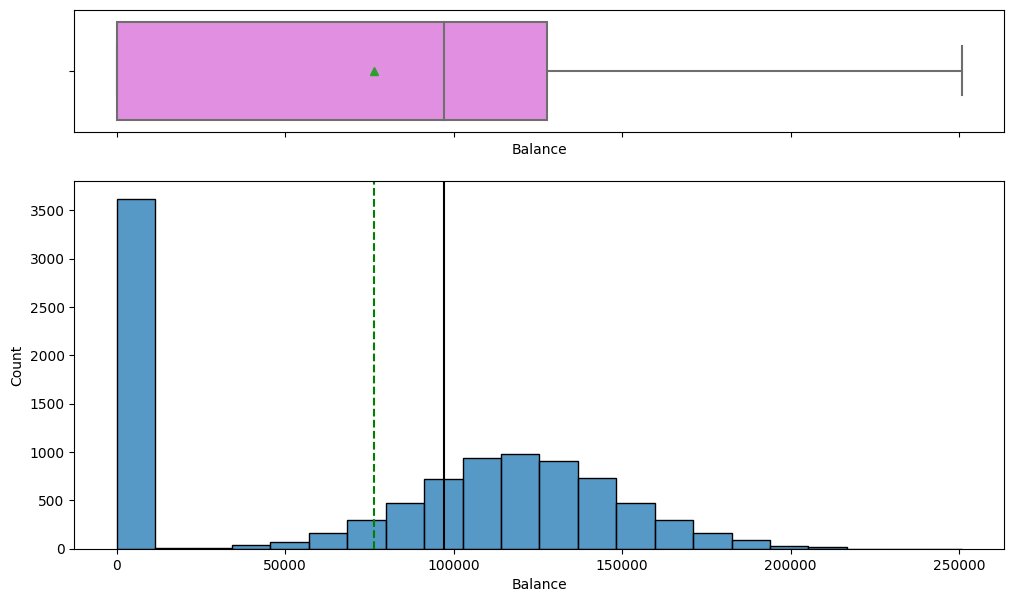

In [ ]:
histogram_boxplot(df,"Balance")
plt.show()

3500 customers have a balance of 0, but the mean balance is 75000, and the median is just shy of 100 000. The max balance observed is 250 000.

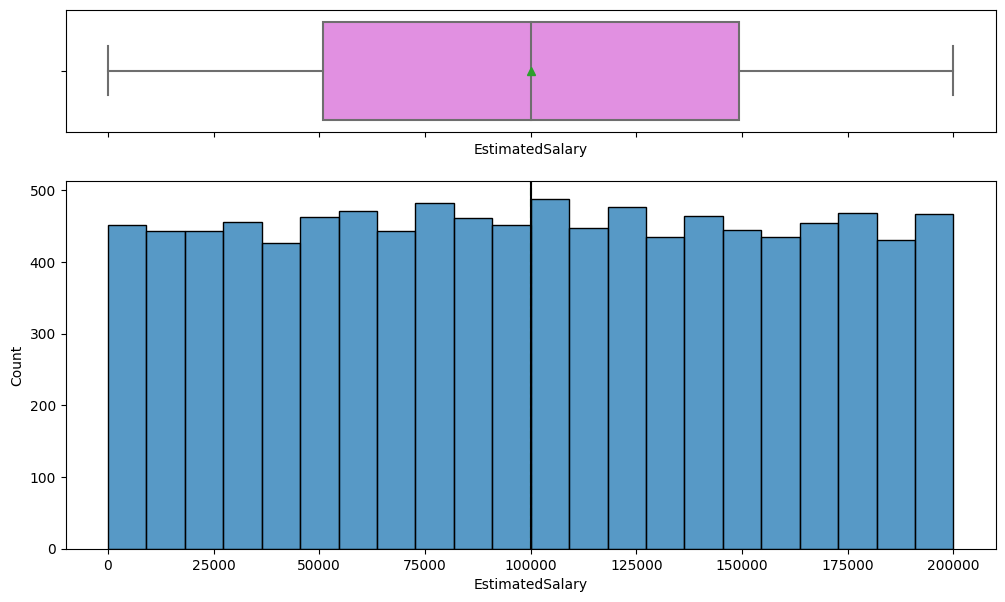

In [ ]:
histogram_boxplot(df,"EstimatedSalary")
plt.show()

'Estimated salary' is evenly distributed, suggesting roughly the same amount of customers/salary range. The question is how the salary is estimated? How accurate is this prediction?

In [ ]:
# Calculating the count and percentage of the two categories in the 'Personal_Loan' column
tenure_counts = df['Tenure'].value_counts()
tenure_percentages = (tenure_counts / len(df)) * 100

print(tenure_counts)
print(tenure_percentages)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64


A tenure of 2, 1, 7, 8, 5 and 3 years are the most frequent (10% of customers/year stated). The least frequent tenure is 0, implying that most customers have been with the bank for at least 1 year.

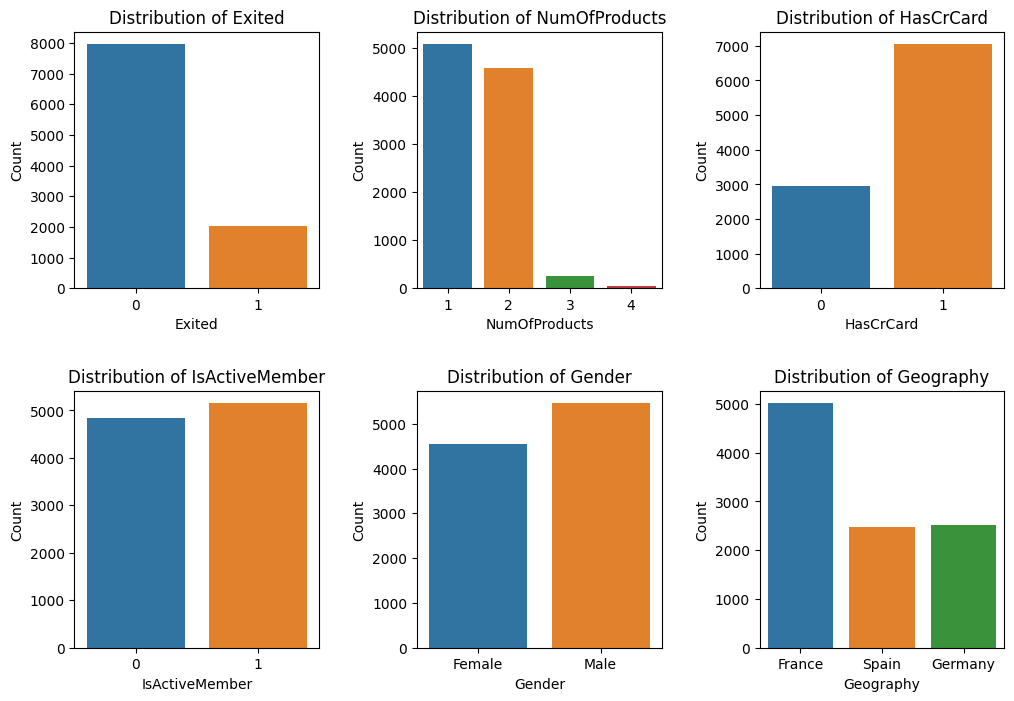

In [ ]:
data_to_explore = ['Exited', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Gender', 'Geography']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
axes = axes.flatten()
# Creating count plots for variables in data_to_explore
for i, variable in enumerate(data_to_explore):
    sns.countplot(data=df, x=variable, ax=axes[i])
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Count')


*   8000 customers have not churned.  

*   Customers usually utilize 1-2 products.

*   7000 customers use a credit card.

*   It is almost a 50/50 chance that the customer is active, that is using bank products regularly, making transactions etc.
*   There are 1000 more males, than females.

*   50% of the customers reside in France and the remainder (25% each) are based in Spain and Germany.

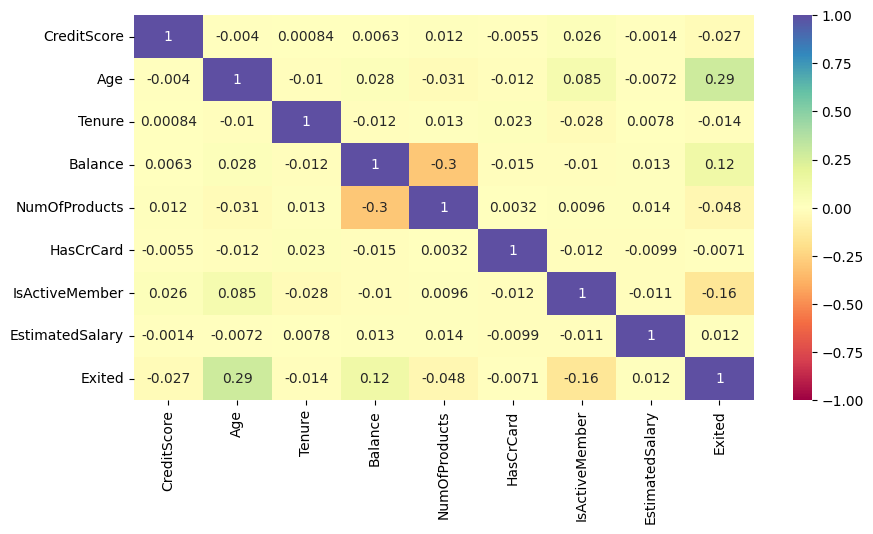

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1);
plt.show()


*   NumOfProducts and Balance have a 0.3 negative correlation
*   Exited and Age have a 0.29 positive correlation





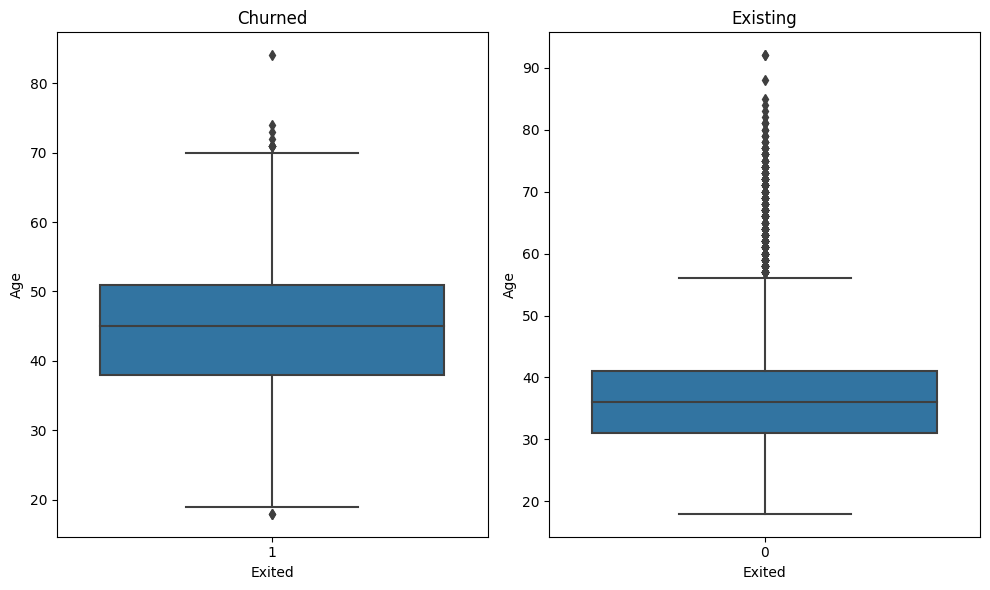

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Age', data=df[df['Exited'] == 1])
plt.title('Churned')

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Age', data=df[df['Exited'] == 0])
plt.title('Existing')

plt.tight_layout()
plt.show()

Since 'Age' was the only notable feature with a correlation factor with our 'Exit' feature, we will take a closer look with a side by side boxplot. We notice outliers present for the '0' category, and the interquartile range for our '1' category is indicating an older age-range to their counterparts. Specifically, an age range between 39 and 51 appears to be associated with higher attrition.

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


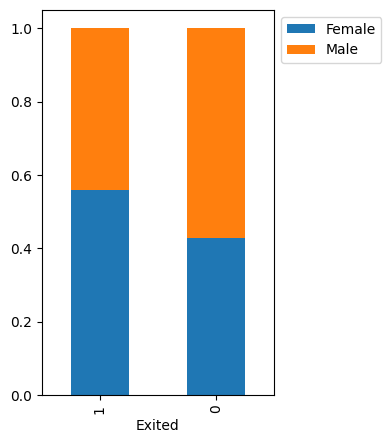

In [ ]:
stacked_barplot(df, 'Exited', 'Gender')

Despite the dataset having 1000 more rows of the opposite gender, a higher number of females attrited compared to males.

Geography  France  Germany  Spain    All
Exited                                  
All          5014     2509   2477  10000
0            4204     1695   2064   7963
1             810      814    413   2037
------------------------------------------------------------------------------------------------------------------------


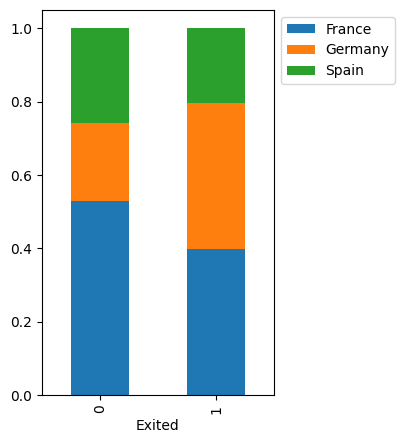

In [ ]:
stacked_barplot(df, 'Exited', 'Geography')

Customers residing in Germany are more likely to attrite. However, their French and Spanish counterparts are more likely to stay with the Bank.

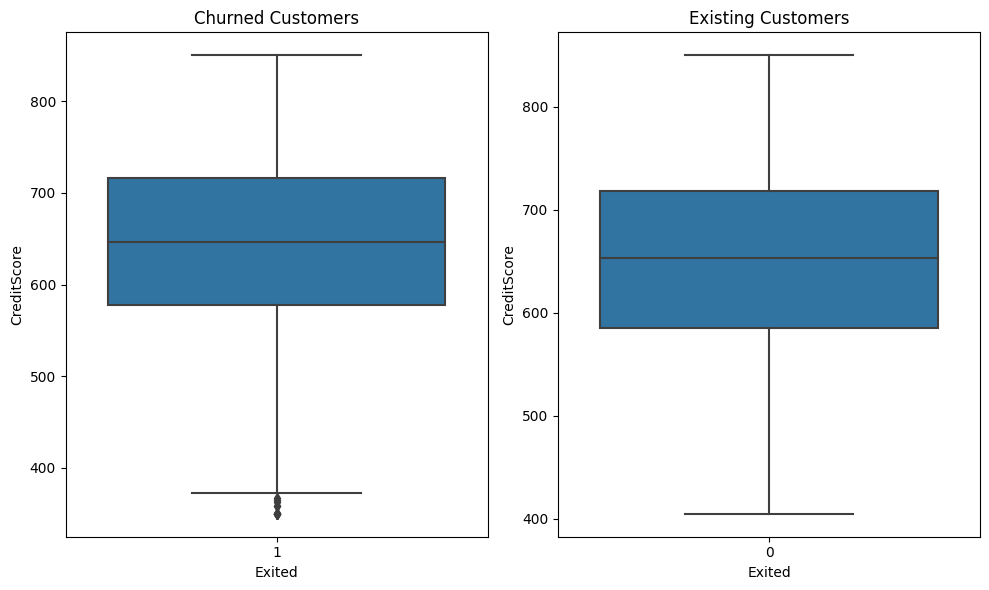

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='CreditScore', data=df[df['Exited'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='CreditScore', data=df[df['Exited'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

No significant difference between our two values in relation to Credit Score.

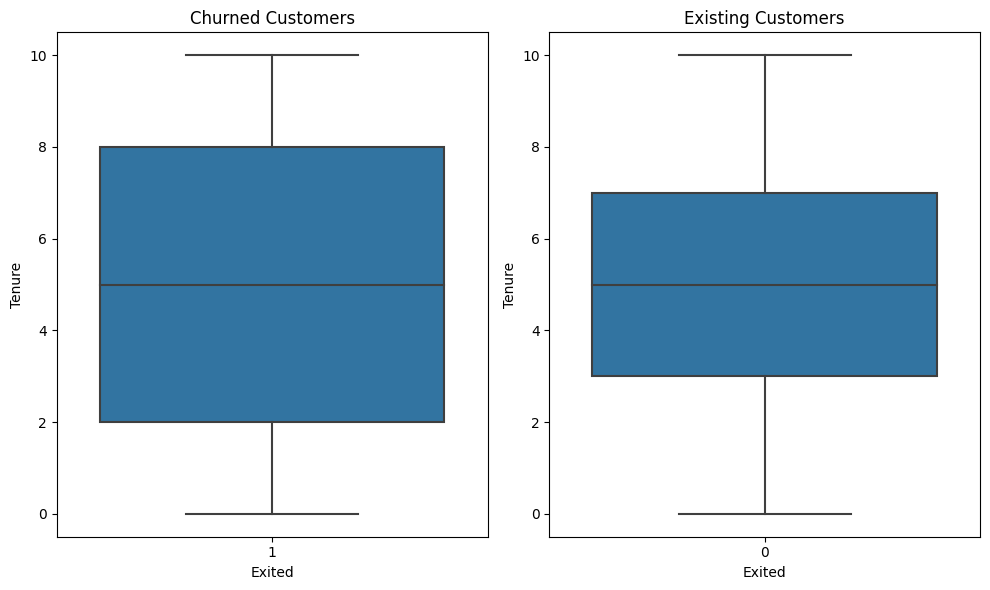

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Tenure', data=df[df['Exited'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Tenure', data=df[df['Exited'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

The interquartile range for churned customers surpasses that of the counterpart, indicating a broader range of tenure for our '1' category.

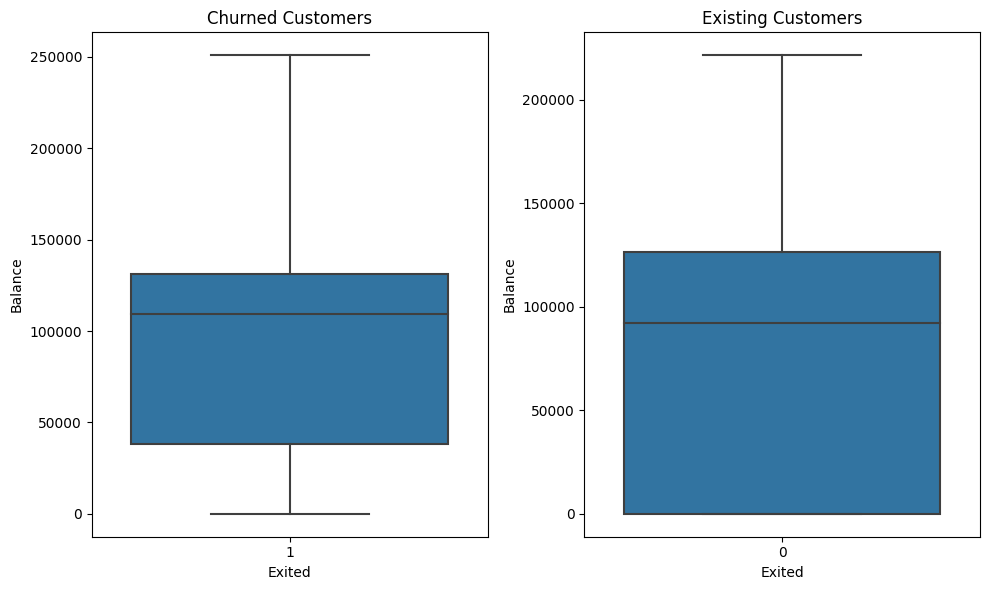

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', data=df[df['Exited'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Balance', data=df[df['Exited'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

50% of our churned customers have a balance between 45000 and 125000, whereas 50% of the customers who have not exited have a balance between 0-125000. Why are customers with a higher bank balance more likely to attrite? Are there better offers with other banks?

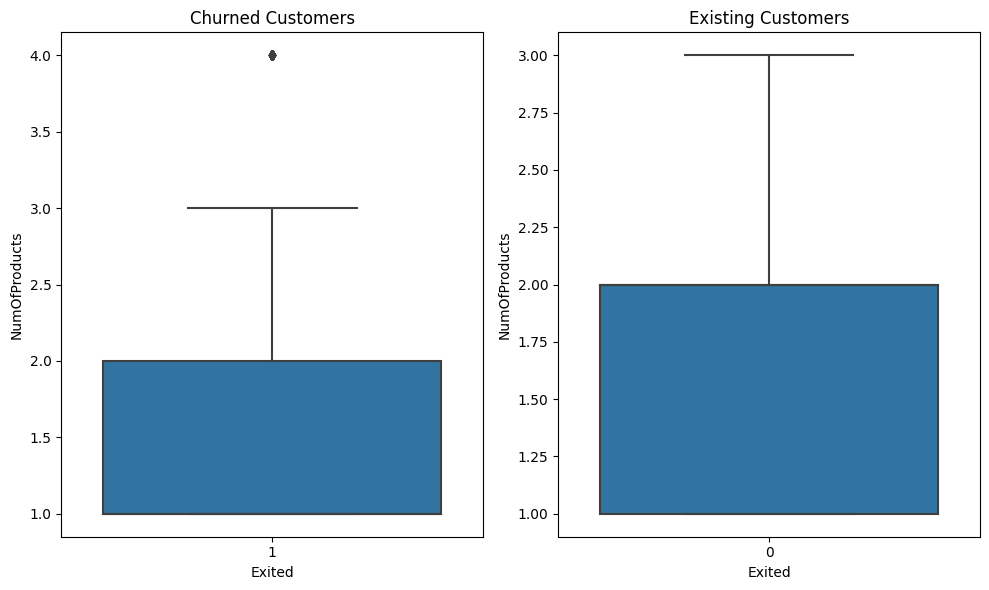

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='NumOfProducts', data=df[df['Exited'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='NumOfProducts', data=df[df['Exited'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

With a minimum of 1 product and a maximum of 3. Outlier detected in the '1' category.

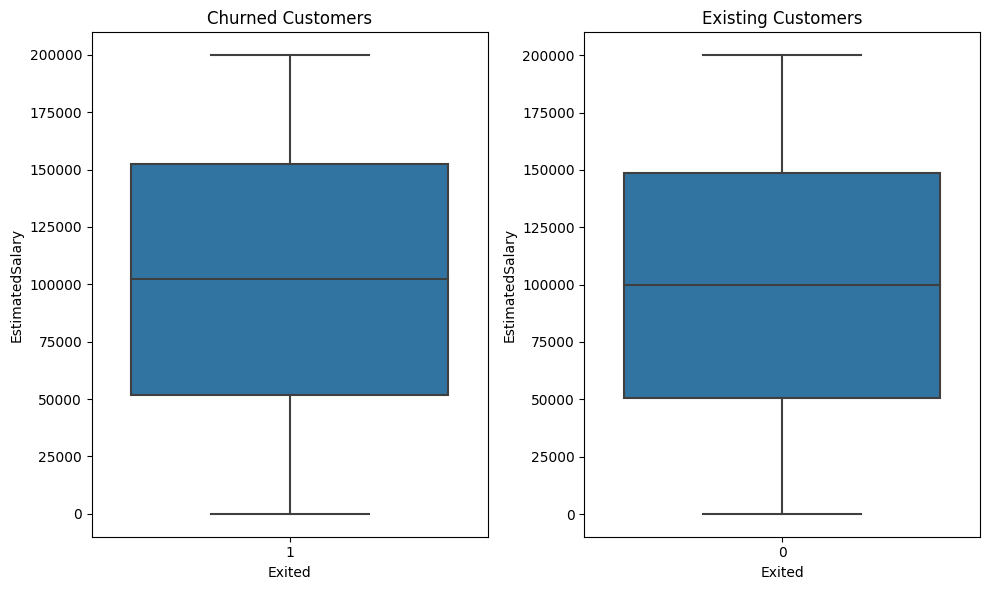

In [ ]:
#Creating side-by-side box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df[df['Exited'] == 1])
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df[df['Exited'] == 0])
plt.title('Existing Customers')

plt.tight_layout()
plt.show()

Almost identical bok plots displayed here, not necessarily providing insight into our churned customers.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


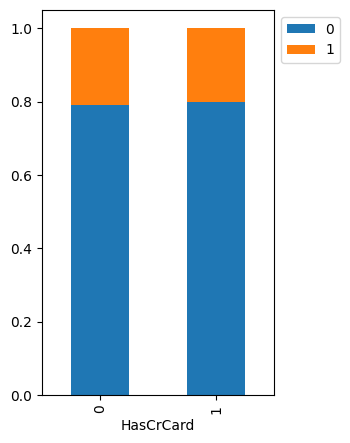

In [ ]:
stacked_barplot(df, 'HasCrCard', 'Exited')

Out of the 2000 customers that left the bank, 1400 had a credit card. Customers who did not attrite also tends to prefer a credit card (5600 out of 8000). This suggests no strong correlation with our target feature.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


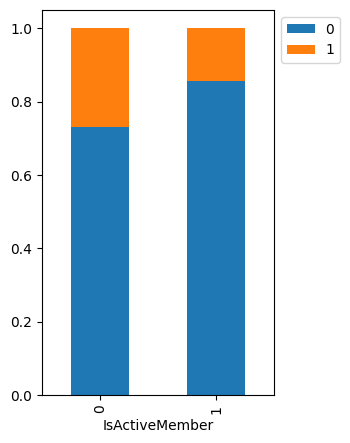

In [ ]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

It is more common for a churned customer to be an inactive member, suggesting that activity may contribute to retention.

In [ ]:
# Checking to make sure we have no missing values before proceeding
missing_values = df.isnull().sum()

# Displaying missing values
print(missing_values)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Questions:

1. What is the distribution of the credit score of customers?
The Credit Score feature is left-skewed, with a few outliers between 100-350. The most common credit score lies between 550-750 and another slight peak at 850. This a wide range in credit scores for their customer base.

2. Are there any noticeable patterns or outliers in the distribution?Age: We notice outliers present for the '0' category. 'Credit score' is left-skewed and showing a few outliers in the 100-350 range.

3. How many active members are there with the bank? 5151 customers are active with the bank, although out of those customers, 735 have churned.

4. How are the different customer attributes correlated to each other?NumOfProducts and Balance have a 0.3 negative correlation
Exited and Age have a 0.29 positive correlation

5. Who is churning more when compared to males and females? Females: 1139 Males: 898

6. Customers from which geographical part are churning more? Germany

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#dropping 'Exited' and adding to our Y variable
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [ ]:
# Splitting the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1,shuffle=True)

#Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
# Using pd.get dummies to encode the categorical columns in the data
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)

In [ ]:
# Checking the shape
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5600, 11)
(1400, 11)
(3000, 11)


X-train has 5600 rows
X_val has 1400 rows
X_test has 3000 rows

Standardizing the features and transforming the data such that it has a mean of 0 and a standard deviation of 1.

In [ ]:
sc = StandardScaler()

# Fitting and transforming the training set
temp = sc.fit(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

# Transforming the test set using the same scaler
X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

# Transforming the validation set using the same scaler
X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Objective:** Develop a neural network classifier to predict customer churn in the next 6 months for a banking service.

**Key Focus:** Emphasis on recall to effectively identify customers at risk of churning.

**Variations:** Build multiple model variations with different architectures, hyperparameters, and regularization techniques.

**Training Process:** Train each model using the training dataset, with a separate validation set for monitoring during training.

**Selection Criteria:** Prioritize models demonstrating high recall, aligning with the goal of identifying potential churn.

**Evaluation Metrics:** Assess final model's performance on a dedicated test set, prioritizing recall.

**Considerations:** Address potential issues like overfitting and ensure the chosen model aligns with project objectives.


### Model Building: Neural Network

In [ ]:
#creating a function for confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

***Model 1***

RMSprop: adjusts the learning rates for different parameters during training

ReLU Activation: enabling the model to learn complex relationships and patterns in the data.

Sigmoid: commonly used as an activation function in the output layer of a binary classification neural network.

Binary Crossentropy Loss Function: well-suited for training models in binary classification tasks, where the goal is to predict whether an example belongs to one of two classes.

Metric=Accuracy: a straightforward metric that measures the overall correctness of the model's predictions across both positive and negative classes.


In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing our first ANN
model1 = Sequential()

# Adding the input layer with 64 neurons and 'relu' activation function with input of 11 variables
model1.add(Dense(units=64, activation='relu', input_dim=11))

# Adding the 1st hidden layer with 32 neurons and 'relu' activation function
model1.add(Dense(units=32, activation='relu'))

# Adding the output layer with one node and 'sigmoid' activation function
model1.add(Dense(units=1, activation='sigmoid'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

# Compiling the model
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                768       
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


We are working with 2881 parameters

We are saving our results in 'history' which allows us to visualize and analyze the model's performance over the training epochs.

In [ ]:
history = model1.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=50,
                          batch_size=32)

Epoch 1/50
175/175 [==============================] - 2s 5ms/step - loss: 0.4720 - accuracy: 0.7880 - val_loss: 0.4079 - val_accuracy: 0.8300
Epoch 2/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8163 - val_loss: 0.3968 - val_accuracy: 0.8357
Epoch 3/50
175/175 [==============================] - 1s 3ms/step - loss: 0.4016 - accuracy: 0.8286 - val_loss: 0.3883 - val_accuracy: 0.8364
Epoch 4/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8352 - val_loss: 0.3780 - val_accuracy: 0.8457
Epoch 5/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8405 - val_loss: 0.3733 - val_accuracy: 0.8414
Epoch 6/50
175/175 [==============================] - 1s 4ms/step - loss: 0.3709 - accuracy: 0.8462 - val_loss: 0.3666 - val_accuracy: 0.8507
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.3624 - accuracy: 0.8473 - val_loss: 0.3635 - val_accuracy: 0.8493
Epoch 

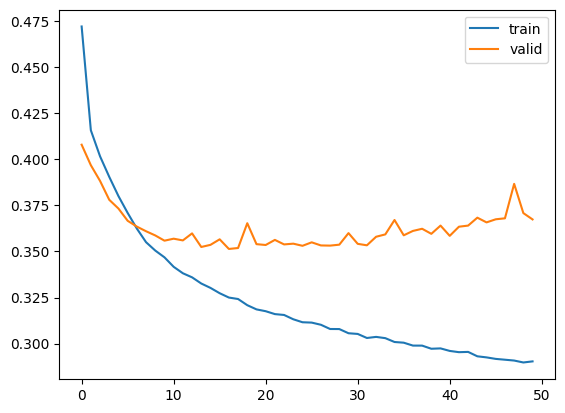

In [ ]:
# Capturing learning history per epoch
hist_model1 = pd.DataFrame(history.history)
hist_model1['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist_model1['loss'])
plt.plot(hist_model1['val_loss'])
plt.legend(("train", "valid"), loc=0)

The significant gap between the training loss (0.2) and validation loss (0.36) at the 50th epoch suggests potential overfitting, indicating that the model may have memorized the training data patterns but struggles to generalize well to unseen data.

44/44 [==============================] - 0s 2ms/step


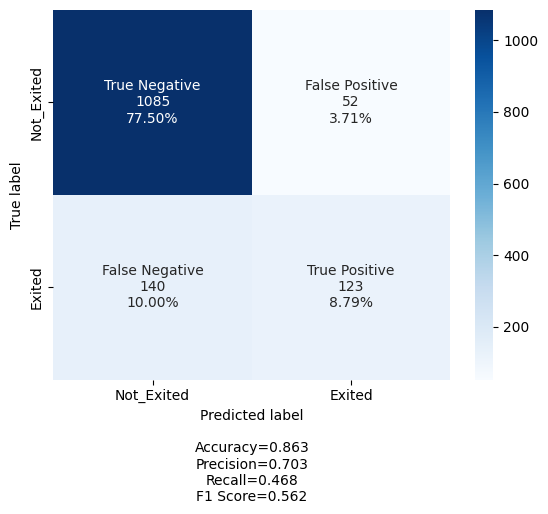

In [ ]:
y_pred_val = model1.predict(X_val)

# Let's predict using the default threshold of 0., meaning if above 0.5, it is class 1
y_pred_val = (y_pred_val > 0.5)

# Calculate the confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)

# Define labels and categories for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']

# Plot the confusion matrix using your custom function
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap='Blues')

Poor Recall score but satisfactory Accuracy. Let's continue building models with improved optimizers and hyperparameters.

**Model 2**

Adam: helping the model learn efficiently and converge faster during training by adapting the step sizes based on how fast and in what direction the model's parameters are changing.

ReLU Activation: enabling the model to learn complex relationships and patterns in the data.

Sigmoid: commonly used as an activation function in the output layer of a binary classification neural network.

Binary Crossentropy Loss Function: well-suited for training models in binary classification tasks, where the goal is to predict whether an example belongs to one of two classes.

Metric=Accuracy: a straightforward metric that measures the overall correctness of the model's predictions across both positive and negative classes.

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
    # Initializing the neural network
    model_Adam = Sequential()

    # Add the input layer with 64 neurons and relu as activation function
    model_Adam.add(Dense(64, activation='relu', input_dim=11))

    # Add the first hidden layer with 32 neurons with relu as activation function
    model_Adam.add(Dense(32, activation='relu'))

    # Add the output layer with Sigmoid Activation
    model_Adam.add(Dense(1, activation='sigmoid'))

    # Initialize the model with Adam Optimizer and a learning rate of 0.001
    optimizer = Adam(0.0001)

    # Compile the model with binary cross entropy as the loss function and accuracy as metrics
    model_Adam.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_Adam.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


We have the same amount of parameters as model_1, 2881

Saving the results in 'history_Adam' which allows us to visualize and analyze the model's performance over the training epochs. Notice that I have increased epochs from 50 to 100.

In [ ]:
history_Adam = model_Adam.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
175/175 [==============================] - 1s 5ms/step - loss: 0.5505 - accuracy: 0.7861 - val_loss: 0.4903 - val_accuracy: 0.8121
Epoch 2/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4890 - accuracy: 0.7952 - val_loss: 0.4587 - val_accuracy: 0.8121
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4666 - accuracy: 0.7952 - val_loss: 0.4429 - val_accuracy: 0.8121
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4529 - accuracy: 0.7961 - val_loss: 0.4328 - val_accuracy: 0.8143
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4436 - accuracy: 0.7984 - val_loss: 0.4254 - val_accuracy: 0.8143
Epoch 6/100
175/175 [==============================] - 1s 3ms/step - loss: 0.4374 - accuracy: 0.8029 - val_loss: 0.4211 - val_accuracy: 0.8229
Epoch 7/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4328 - accuracy: 0.8079 - val_loss: 0.4172 - val_accuracy: 0.8229

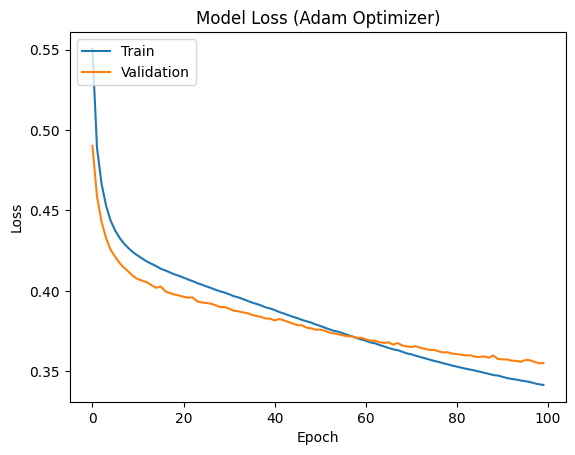

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_Adam.history['loss'])
plt.plot(history_Adam.history['val_loss'])
plt.title('Model Loss (Adam Optimizer)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As we can observe from the above graph, our Adam_model is performing significantly better than our previous model_1. We increased the number of epochs to 100 and used the Adam optimizer with a learning rate of 0.0001.

44/44 [==============================] - 0s 1ms/step


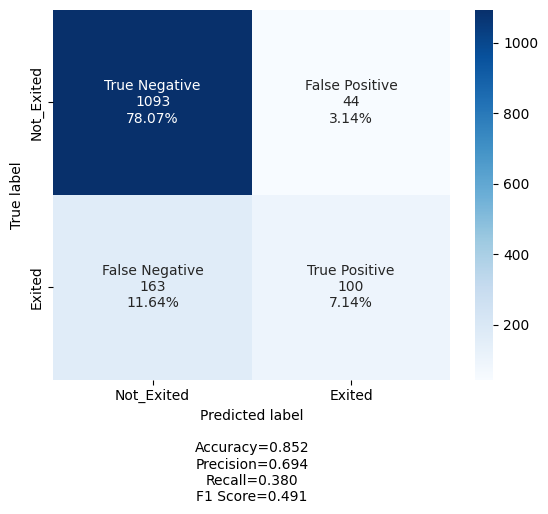

In [ ]:
y_pred_val = model_Adam.predict(X_val)

# Let's predict using the default threshold of 0.5
y_pred_val = (y_pred_val > 0.5)

# Calculate the confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)

# Define labels and categories for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']

# Plot the confusion matrix using your custom function
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap='Blues')

While our Loss Plot demonstrated less overfittng, the recall score is worse than Model1, indicating room for improvement.

**Model 3**

Adam: helping the model learn efficiently and converge faster during training by adapting the step sizes based on how fast and in what direction the model's parameters are changing.

ReLU Activation: enabling the model to learn complex relationships and patterns in the data.

Sigmoid: commonly used as an activation function in the output layer of a binary classification neural network.

Binary Crossentropy Loss Function: well-suited for training models in binary classification tasks, where the goal is to predict whether an example belongs to one of two classes.

Metric=Accuracy: a straightforward metric that measures the overall correctness of the model's predictions across both positive and negative classes.

Callbacks (early stopping): decides to stop the training process if it sees that the improvement in the validation loss is not significant.

Dropout: preventing the model from relying too much on specific features and improving robustness.



### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the neural network
model_3 = Sequential()

# Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32, activation='relu', input_dim=11))

# Adding dropout with dropout_rate=0.3
model_3.add(Dropout(0.3))

# Adding the first hidden layer with 16 neurons with relu as activation function
model_3.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.1
model_3.add(Dropout(0.2))

# Adding the second hidden layer with 8 neurons with relu as activation function
model_3.add(Dense(8, activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation='sigmoid'))

optimizer = Adam(0.001)

early_stop = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=15)

# Compiling the model with binary cross-entropy as the loss function and accuracy as a metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                384       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-traina

We are working with less parameters in this model

Saving saving the results in 'history_3' which allows us to visualize and analyze the model's performance over the training epochs. We are working with 100 epochs and a 32 batch size as well as our EarlyStopping callback.

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stop])

Epoch 1/100
175/175 [==============================] - 2s 5ms/step - loss: 0.5355 - accuracy: 0.7696 - val_loss: 0.4472 - val_accuracy: 0.8121
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4676 - accuracy: 0.7955 - val_loss: 0.4282 - val_accuracy: 0.8121
Epoch 3/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7975 - val_loss: 0.4214 - val_accuracy: 0.8179
Epoch 4/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.7982 - val_loss: 0.4195 - val_accuracy: 0.8179
Epoch 5/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8012 - val_loss: 0.4101 - val_accuracy: 0.8221
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8029 - val_loss: 0.4102 - val_accuracy: 0.8229
Epoch 7/100
175/175 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8084 - val_loss: 0.4071 - val_accuracy: 0.8257

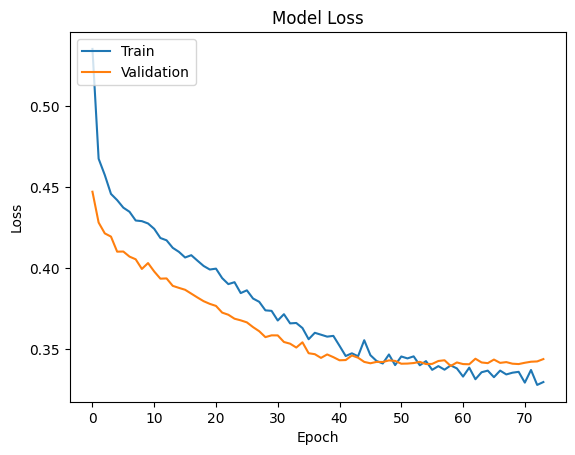

In [ ]:
# Plotting Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

On the 74th epoch, the training of my model_3 came to a halt. This indicates that the model had reached a point where further training did not significantly improve its performance, suggesting it had entered an optimal range.

44/44 [==============================] - 0s 1ms/step


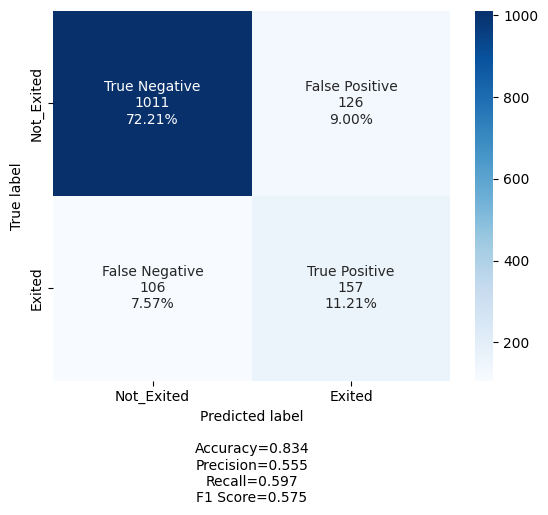

In [ ]:
y_pred_val = model_3.predict(X_val)

# Let's predict using the default threshold of 0.3
y_pred_val = (y_pred_val > 0.3)

# Calculate the confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)

# Define labels and categories for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']

# Plot the confusion matrix using your custom function
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap='Blues')

The recall score, particularly important when focusing on the minority class (class 1, "Exited"), is noted at 41%. This suggests that the model's ability to correctly identify instances of the minority class needs severe improvement. Enhancing recall is crucial for ensuring that instances of class 1 are captured more comprehensively, reducing false negatives and enhancing the model's effectiveness in identifying individuals who are likely to exit.

### Model Improvement: Neural Network model with Hyperparameter tuning

Model 4

Adam: helping the model learn efficiently and converge faster during training by adapting the step sizes based on how fast and in what direction the model's parameters are changing.

ReLU Activation: enabling the model to learn complex relationships and patterns in the data.

Sigmoid: commonly used as an activation function in the output layer of a binary classification neural network.

Binary Crossentropy Loss Function: well-suited for training models in binary classification tasks, where the goal is to predict whether an example belongs to one of two classes.

Metric= Accuracy: a straightforward metric that measures the overall correctness of the model's predictions across both positive and negative classes.

Callbacks (early stopping): decides to stop the training process if it sees that the improvement in the validation loss is not significant.

Dropout: preventing the model from relying too much on specific features and improving robustness.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model(learning_rate=0.001, class_weight=None):
    model_hyper = Sequential()

    # Adding the input layer with He uniform initialization and ReLU activation
    model_hyper.add(Dense(units=64, activation='relu', input_dim=11))

    # Adding dropout with a dropout rate of 0.4
    model_hyper.add(Dropout(0.2))

    # Adding the hidden layer with He uniform initialization and ReLU activation
    model_hyper.add(Dense(units=32, activation='relu'))

    # Adding additional dropout after the hidden layer
    model_hyper.add(Dropout(0.4))

    # Adding the output layer with sigmoid activation for binary classification
    model_hyper.add(Dense(units=1, activation='sigmoid'))

    # Adding Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=0.001)

    # Compiling the model with binary cross-entropy as the loss function and accuracy as a metric
    model_hyper.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model_hyper

In the next step, we employ grid search to fine-tune the performance of our neural network model by optimizing three critical hyperparameters: batch size,learning rate and class weight. Grid search systematically explores various combinations of these hyperparameter values to identify the configuration that yields the best model performance. This method allows us to efficiently navigate the hyperparameter space, helping us find the most suitable combination for enhancing the training process and achieving optimal results in our neural network.

In [ ]:
# Creating a KerasClassifier with the create_model function
keras_estimator = KerasClassifier(build_fn=create_model, verbose=0)

# Defining the grid search parameters
param_grid = {
    'batch_size': [32, 64, 128],
    'learning_rate': [0.1, 0.01, 0.001],
    'class_weight': [{0: 0.1, 1:15}, {0: 1, 1: 10}]
}
es_cb = callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=15)

# Creating and fitting the GridSearchCV recall as the scoring metric
grid = GridSearchCV(estimator=keras_estimator, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='recall')
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

# Printing the best parameters and corresponding recall
print("Best Parameters: ", grid_result.best_params_)
print("Best Recall: ", grid_result.best_score_)

Best Parameters:  {'batch_size': 32, 'class_weight': {0: 0.1, 1: 15}, 'learning_rate': 0.1}
Best Recall:  1.0


Based on the above, the training data can yield a perfect recall score. However, this may not be the case for the validation set. We can see what the optimal parameters are after using the GridSearchCV feature. We will use these hyperparameters in the next step.

In [ ]:
# Creating the model with the best hyperparameters
best_hyper = create_model(learning_rate=0.1, class_weight={0: 0.1, 1: 15})
best_hyper.summary()

# Setting the batch size during training
batch_size = 32

#creating history_h, ading 100 epochs, using batch size determined earlier and callbacks
history_h = best_hyper.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=1, validation_data=(X_val, y_val),callbacks=[es_cb])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                768       
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
175/175 [==============================]

We stopped training at the 38th epoch.

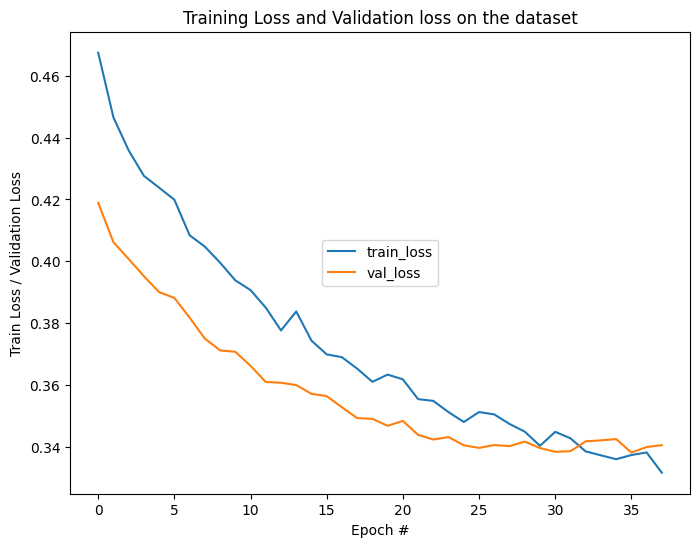

In [ ]:
N = 38

plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("Train Loss / Validation Loss")
plt.legend(loc="center")
plt.show()

The 38th epoch allowed the traning and validation loss to almost align and overfitting has been avoided.

44/44 [==============================] - 0s 5ms/step


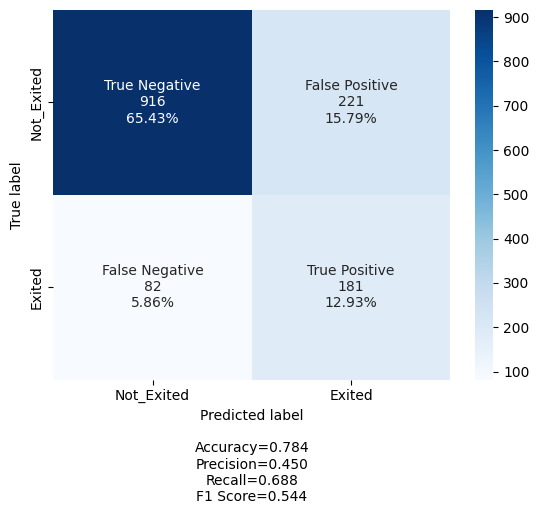

In [ ]:
y_pred_val = best_hyper.predict(X_val)

# Let's predict using the default threshold of 0.2
y_pred_val = (y_pred_val > 0.2)

# Calculate the confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)

# Define labels and categories for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']

# Plot the confusion matrix using your custom function
make_confusion_matrix(cm_val, group_names=labels, categories=categories, cmap='Blues')

The recall score is still displaying unsatisfactory results,especially with recall, even after hyperparameter tuning. Having 146 cases of FN is not optimal in our use case. It is predicting that customers did not exit more consistantly than predicting true positives. We should continue with our next model.

### Model Improvement: Neural Network model with balanced data

**Model 5**

SMOTE: a technique used to address class imbalance by generating synthetic examples of the minority class.

Adam: helping the model learn efficiently and converge faster during training by adapting the step sizes based on how fast and in what direction the model's parameters are changing.

ReLU Activation: enabling the model to learn complex relationships and patterns in the data.

Sigmoid: commonly used as an activation function in the output layer of a binary classification neural network.

Binary Crossentropy Loss Function: well-suited for training models in binary classification tasks, where the goal is to predict whether an example belongs to one of two classes.

Metric=Accuracy: a straightforward metric that measures the overall correctness of the model's predictions across both positive and negative classes.

Dropout: preventing the model from relying too much on specific features and improving robustness.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('After UpSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_resampled.shape))

After UpSampling, the shape of train_X: (8906, 11)
After UpSampling, the shape of train_y: (8906,) 



In [ ]:
model_5 = Sequential()

# Adding an input layer of 32 neurons with relu as the activation function
model_5.add(Dense(32, activation='relu', input_dim=11))

# Adding dropout with a dropout rate of 0.2
model_5.add(Dropout(0.2))

# Adding a hidden layer with 16 neurons and relu as the activation function
model_5.add(Dense(16, activation='relu'))

# Adding dropout
model_5.add(Dropout(0.1))

# Adding dense layers with 8 neurons and relu as the activation function
model_5.add(Dense(8, activation='relu'))

# Sigmoid activation function in the final layer
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                384       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-traina

Less parameters (1057) than our other models.

In [ ]:
# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.0001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100
history_5 = model_5.fit(X_train_resampled, y_train_resampled, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
140/140 [==============================] - 1s 4ms/step - loss: 0.6796 - accuracy: 0.5639 - val_loss: 0.6167 - val_accuracy: 0.7379
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.6043 - val_loss: 0.6095 - val_accuracy: 0.7486
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.6334 - val_loss: 0.5963 - val_accuracy: 0.7436
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6492 - val_loss: 0.5879 - val_accuracy: 0.7343
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 0.6220 - accuracy: 0.6689 - val_loss: 0.5811 - val_accuracy: 0.7271
Epoch 6/100
140/140 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.6746 - val_loss: 0.5708 - val_accuracy: 0.7321
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.6832 - val_loss: 0.5642 - val_accuracy: 0.7286

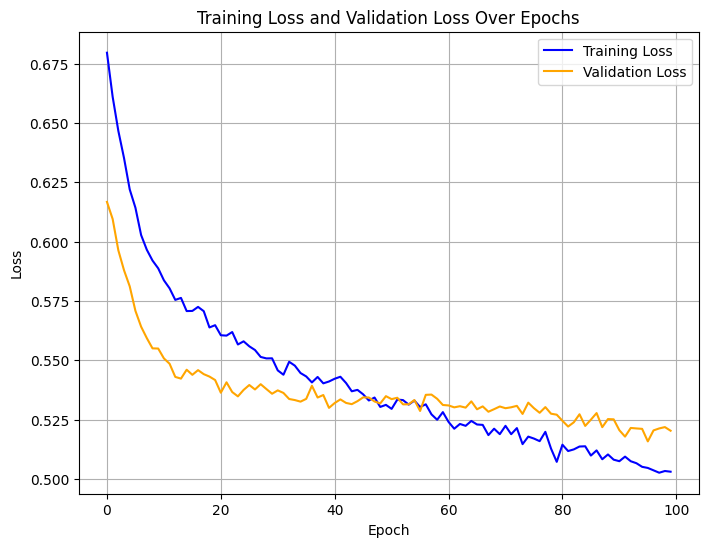

In [ ]:
N = len(history_5.history["loss"])

# Plotting the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, N), history_5.history["loss"], label="Training Loss", color='blue')
plt.plot(np.arange(0, N), history_5.history["val_loss"], label="Validation Loss", color='orange')

# Adding title and labels
plt.title("Training Loss and Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Adding legend and grid
plt.legend(loc="upper right")
plt.grid(True)

# Display the plot
plt.show()

The graph is displaying a sound relationship between training and validation which is positive. No overfitting suspected based on the above details. However, the loss observed is not optimal for our model.

Let's generate two distinct confusion matrices—one for the original validation data and another for the training data with SMOTE resampling. This approach provides a comprehensive evaluation of the model's performance under different scenarios.

279/279 [==============================] - 1s 3ms/step


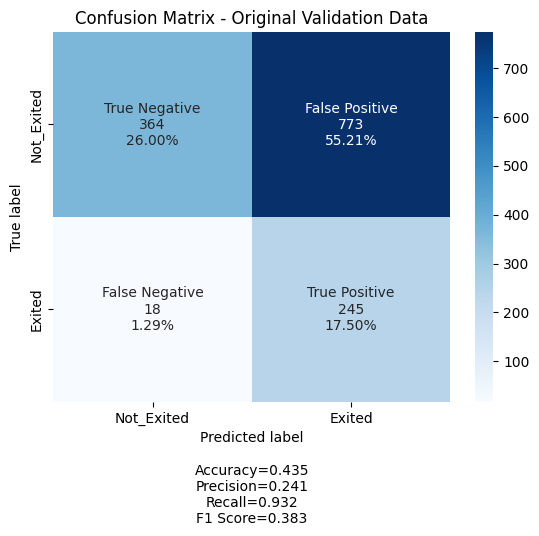

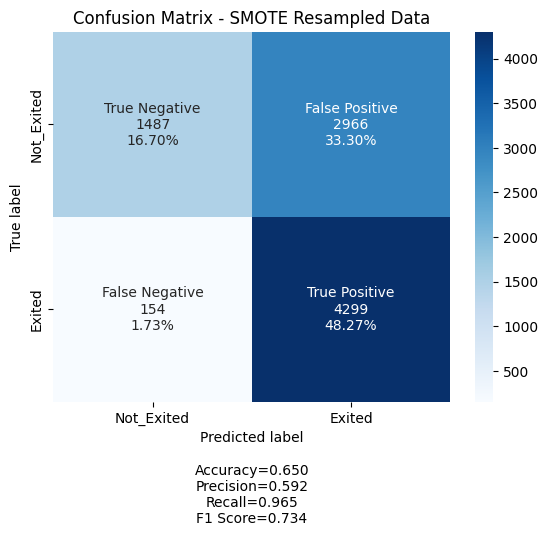

In [ ]:
y_pred_val = model_5.predict(X_val)

# Let's predict using the default threshold of 0.2
y_pred_val = (y_pred_val > 0.2)

# Calculate the confusion matrix on the original validation data
cm_val_original = confusion_matrix(y_val, y_pred_val)

# Calculate the confusion matrix on the SMOTE-resampled data
cm_val_resampled = confusion_matrix(y_train_resampled, model_5.predict(X_train_resampled) > 0.2)

# Define labels and categories for the confusion matrices
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['Not_Exited', 'Exited']

# Plot the confusion matrix for the original validation data
make_confusion_matrix(cm_val_original, group_names=labels, categories=categories, cmap='Blues', title='Confusion Matrix - Original Validation Data')

# Plot the confusion matrix for the SMOTE-resampled data
make_confusion_matrix(cm_val_resampled, group_names=labels, categories=categories, cmap='Blues', title='Confusion Matrix - SMOTE Resampled Data')

Based on our confusion matrix, model_5 is performing satisfactorily, unlike the other models. Based on these results, I am selecting model_5 as our final model.

## Final Model

Although our model_5 hasn't reached optimal performance yet, it has shown a notable improvement compared to the other four models. The implementation of SMOTE successfully balanced the classes, yielding positive outcomes. Specifically, changing the threshold to >0.2 helped our recall score tremendously. This means, if the score is above 0.2, it is considered class 1. Our focus in this project is a high recall which we now have achieved (0.93) with validation data and 0.96 with SMOTE.

Now that we have identified our best-performing model, the next step involves evaluating its performance on unseen data using our test set.

In [ ]:
model_final = model_5

# Predicting probabilities on the test data
y_pred_test_prob = model_final.predict(X_test)

# Directly use the predicted probabilities as labels
y_pred_test = (y_pred_test_prob >= 0.2).astype(int)

# Print the classification report and confusion matrix
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix on Test Data:")
print(confusion_matrix(y_test, y_pred_test))

# Calculate and print accuracy

94/94 [==============================] - 0s 1ms/step
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.94      0.35      0.51      2373
           1       0.27      0.92      0.42       627

    accuracy                           0.47      3000
   macro avg       0.61      0.63      0.46      3000
weighted avg       0.80      0.47      0.49      3000

Confusion Matrix on Test Data:
[[ 828 1545]
 [  50  577]]


As observed above, class 0 has a recall score of 0.35 but a precision score of 0.94, whereas class 1 has a recall score of 0.92 but a precision score of 0.27.

94/94 [==============================] - 0s 4ms/step


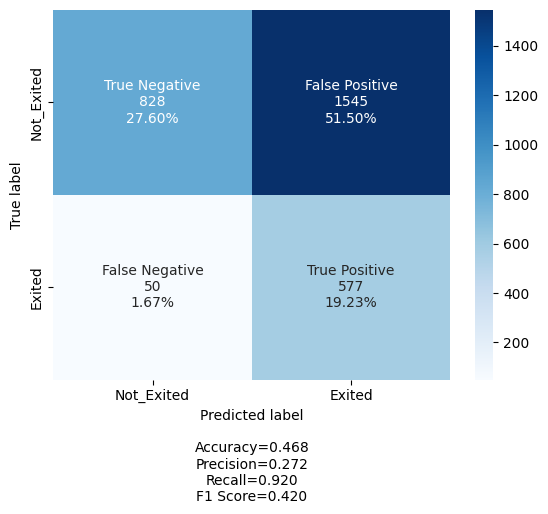

In [ ]:
model_final = model_5

# Predicting probabilities on the test data
y_pred_test_prob = model_final.predict(X_test)

# Convert probabilities to binary predictions
y_pred_test = (y_pred_test_prob >= 0.2).astype(int)

# Calculate the confusion matrix
final_cm_test = confusion_matrix(y_test, y_pred_test)

# Defining labels and categories
labels_test = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories_test = ['Not_Exited', 'Exited']

# Plotting the confusion matrix for the test data
make_confusion_matrix(final_cm_test, group_names=labels_test, categories=categories_test, cmap='Blues')

As indicated earlier, we have 50 FN and 577 TP. Our FP is high at 1545 which may cost resources, but retention and marketing will be crucial here.

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**

**Business Insights and Recommendations:**

Customer churn is a critical concern for banking services, as it directly impacts revenue and customer satisfaction. The evaluation of five neural network models aimed at predicting churn within the next six months provides valuable insights into the dynamics influencing customer behavior. Each model exhibits variations in recall and accuracy, enabling us to tailor our strategies for customer retention.

**Insights:**

**Model Performance Variation:**
The models showcase diverse performances, highlighting the significance of nuanced approaches in predicting customer churn. Model 5, incorporating SMOTE on the training data, achieves the highest recall. Model 4, optimized with GridSearchCV, strikes a balance between recall and accuracy, presenting a competitive option for deployment.

**Trade-off Between Recall and Accuracy**:
While Model 5 demonstrates exceptional recall, the trade-off is reflected in lower accuracy on the test set. It emphasizes the challenge of achieving a model that is sensitive to potential churn while maintaining an acceptable level of accuracy in predictions. The business must weigh the importance of recall against overall accuracy based on its specific goals and resources.

**SMOTE Augmentation Impact:**
Model 5, enhanced with Synthetic Minority Over-sampling Technique (SMOTE) stands out for its remarkable recall scores. This augmentation addresses the imbalance in the dataset, making the model more adept at identifying potential churn instances. However, it's crucial to note the drop in accuracy,  indicating a potential need for further fine-tuning.

**Recommendations:**

**Model:5**
Opting for Model 5 is a strategic decision rooted in its exceptional recall performance. This model empowers us to delve deeper into customer behavior, providing valuable insights into the factors influencing their decision to potentially churn. The nuanced understanding gained enables us to tailor our products and services to different customer segments. Notably, it allows us to identify trends such as higher attrition rates among specific demographics, such as females or customers in Germany.

Future Analysis:
Undertake a thorough analysis to understand the repercussions of false negatives. Allocating resources and funds to further improve on the model and planning and executing marketing plans accordingly.

Retention Strategies:
Leverage the insights provided by Model 5 to develop customer-centric retention strategies. Identify high-risk churns and be proactive.

In conclusion, the selection of Model 5 positions the bank to proactively address customer churn. While mindful of its generalization challenges, the model's strengths in recall make it a valuable tool in customer relationship management. The bank's commitment to ongoing refinement, strategic deployment, and customer-centric interventions will be pivotal in maximizing the impact of Model 5 in the dynamic landscape of customer retention.

In conclusion, the adoption of a neural network model offers a strategic advantage in predicting and mitigating customer churn. The insights gained from model evaluations and EDA provide a foundation for informed decision-making.

___

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/Emma_Campodonico_Project4_Full_code_version.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Emma_Campodonico_Project4_Full_code_version.ipynb to html
[NbConvertApp] Writing 2036163 bytes to /content/drive/MyDrive/Colab_Notebooks/Emma_Campodonico_Project4_Full_code_version.html


In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Colab_Notebooks/Emma_Campodonico_Project4_Full_code_version.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>